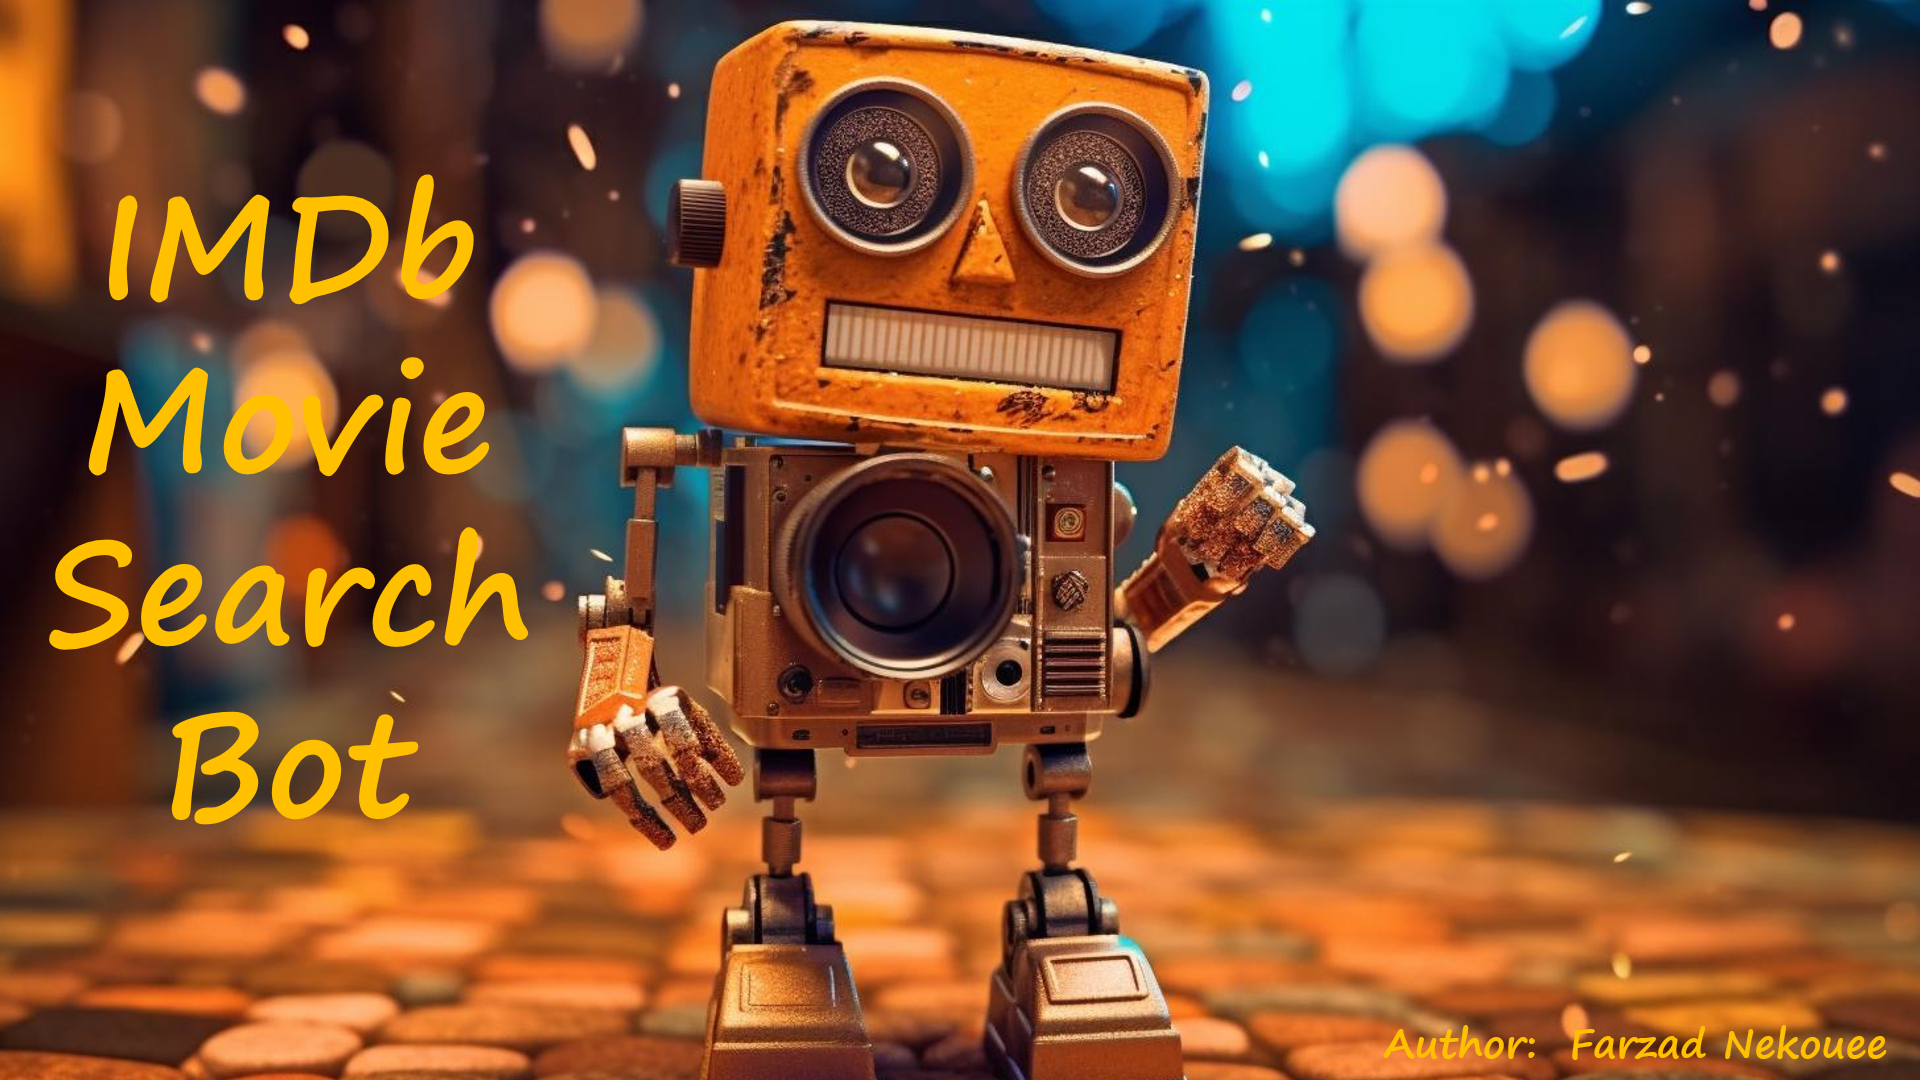

In [1]:
from IPython.display import display, HTML

# Youtube
YouTubeVideo_ID = 'XOuSuK44wJs'

# create a HTML string to center the video
html_str = """
<div style="display: flex; justify-content: center;">
    <iframe width="960" height="540" src="https://www.youtube.com/embed/{}" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>
""".format(YouTubeVideo_ID)

# Display HTML
display(HTML(html_str))

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

This project demonstrates the capabilities of a Telegram bot that harnesses the power of the IMDb database to deliver detailed movie information to users. Here's a breakdown of the bot's key features, each of which has been demonstrated in the video above:

* __Built with Python__: The bot leverages Python, a flexible and powerful programming language, to handle the core functionalities.

* __Utilizes Telegram's Bot API__: The bot is integrated with Telegram's API, allowing it to operate smoothly within the platform.

* __Employs python-telegram-bot library__: This library simplifies the process of developing and maintaining the bot, aiding in creating a more robust and reliable tool.

* __IMDb API integration__: By integrating with the IMDb API, the bot can provide comprehensive and accurate movie information.

* __Inline movie search__: Users can perform movie searches directly within their Telegram chats, enhancing the user experience and maintaining the flow of conversation.

* __Detailed movie information__: Upon selecting a movie, the bot displays a wealth of details, including but not limited to, the title, rating, release date, languages, countries, duration, genres, stars, directors, writers, awards, and a brief storyline.

* __Movie images and trailers__: Users can view movie images and watch trailers directly in their chats, bringing the cinematic world into their conversations.

* __Personalized watchlist__: Users can create and manage a personalized watchlist of movies, ensuring they never lose track of the films they want to see.

* __Interactive user interface__: The bot's intuitive interface ensures that users can easily access its features and capabilities, thereby enhancing the overall user experience.

This bot is a perfect example of how Python programming, coupled with efficient library usage and API integration, can create a powerful, user-friendly tool capable of fetching and presenting extensive information from a database like IMDb. Please feel free to explore the code in my GitHub repository, try the bot, and make the most of its functionalities.

<h2 align="left"><font color=#f7aa02>Let's get started:</font></h2>

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">
    
First of all, we need to install the __python-telegram-bot__ library (__version 13.3__) which is essential for our project. To do this, simply run the following command in a code cell:

In [2]:
!pip install python-telegram-bot==13.3

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

In this part, we import essential components from the __telegram__ and __telegram.ext__ modules, which are necessary to interact with the Telegram API, handle user input, and create interactive elements like buttons and inline queries. Additionally, we import the __requests__ library, which is used for making HTTP requests to external APIs such as the IMDb API:

In [3]:
from telegram import Update, InlineKeyboardMarkup, InlineKeyboardButton, InlineQueryResultArticle, InputTextMessageContent, InputMediaPhoto
from telegram.ext import Updater, CommandHandler, CallbackQueryHandler, InlineQueryHandler, MessageHandler, Filters
import requests

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

First of all, we need to set up our API keys:
* The __API_KEY__ variable holds the unique API key for our Telegram bot, which is used to authenticate and communicate with the Telegram API. 
*  The __IMDB_API_KEY__ variable stores our IMDb API key, which allows us to fetch movie information from IMDb.

In addition, we initialize a dictionary named __user_watchlists__ to store users' watchlists. The keys in the dictionary will be the user IDs, and the values will be another dictionary with movie IDs as keys and movie titles as values. This structure will help us keep track of each user's watchlist and manage the movies in their lists.

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

__⚠️ Important Note:__

In order to successfully run this notebook, you need to replace the placeholders for `API_KEY` and `IMDB_API_KEY` with your own Telegram Bot API key and IMDb API key respectively.

In [4]:
# Telegram Bot API key
API_KEY = "your_telegram_bot_api_key"  

# IMDb API key   
IMDB_API_KEY = "your_imdb_api_key"

# Store users' watchlists as a dictionary
user_watchlists = {}

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">
    
This part of the code defines the __start__ function, which is triggered when a user starts the bot by either opening the chat or sending the __/start__ command. This function sends a welcome message to the user and briefly introduces the bot's functionality:

In [5]:
# Welcome message when the bot starts
def start(update, context):
    message = "👋 Welcome to the IMDb Movie Bot!\n\n📽️ You can access the bot tools through the Menu."
    update.message.reply_text(message)

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

Now we define the __restart__ function, which is triggered when a user sends the __/restart__ command. The function sends a message to the user with instructions on how to restart the bot.

In [6]:
# Restart message when the user sends /restart command
def restart(update, context):
    message = "🔄 To restart the bot, please close and reopen the chat with the bot, or send the /start command again."
    update.message.reply_text(message)

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

In this section of the code, we define the __tools__ function, which is activated when a user sends the __/tools__ command. The function displays two available tools for the user to interact with the bot: 
* 🎬 __Search Movie__ - Allows users to search for movie information.
* 📋 __View Watchlist__ - Enables users to view and manage their personal watchlist.


In [7]:
# Display available tools when the user sends /tools command
def tools(update, context):
    message = "🔎 Choose a tool:"
    keyboard = InlineKeyboardMarkup(
        [
            [InlineKeyboardButton("🎬 Search Movie", switch_inline_query_current_chat="")],
            [InlineKeyboardButton("📋 View Watchlist", callback_data="view_watchlist")],
        ]
    )
    update.message.reply_text(message, reply_markup=keyboard)  # Send the message with the inline keyboard

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

This section of the code defines the __handle_callback_query__ function, which manages callback queries generated by the bot when users interact with inline buttons. The function handles multiple cases based on the received data:

* __view_watchlist__ - Displays the user's watchlist with movie titles and delete buttons.
* __delete_from_watchlist__ - Removes a movie from the user's watchlist and updates the displayed watchlist.
* __movie_in_watchlist__ - Informs the user that a movie is in their watchlist.
* __add_to_watchlist__ - Adds a movie to the user's watchlist if it isn't already there.
* __view_images__ - Fetches and displays movie images, along with buttons to watch the movie trailer and add the movie to the watchlist.
    
To achieve these functionalities, the code makes use of the IMDb API to retrieve the necessary movie information, constructs inline keyboards to provide user interaction, and updates the __user_watchlists__ dictionary to store the watchlist data for each user.

In [8]:
# Handle callback queries (button clicks)
def handle_callback_query(update, context):
    query = update.callback_query
    data = query.data
    
    # Handle "view_watchlist" button click
    if data == "view_watchlist":
        user_id = query.from_user.id

        if user_id not in user_watchlists or not user_watchlists[user_id]:
            query.message.reply_text("🚫 Your watchlist is empty.")
        else:
            keyboard = [
                [
                    InlineKeyboardButton(f"{i+1}. {title}", callback_data=f"movie_in_watchlist:{movie_id}:{title}"),
                    InlineKeyboardButton("🗑️", callback_data=f"delete_from_watchlist:{movie_id}")
                ]
                for i, (movie_id, title) in enumerate(user_watchlists[user_id].items())
            ]

            reply_markup = InlineKeyboardMarkup(keyboard)
            query.message.reply_text("👁️ Your watchlist:", reply_markup=reply_markup)
    
    # Handle "delete_from_watchlist" button click
    elif data.startswith("delete_from_watchlist:"):
        _, movie_id = data.split(":", 1)
        user_id = query.from_user.id

        if user_id in user_watchlists and movie_id in user_watchlists[user_id]:
            del user_watchlists[user_id][movie_id]
            query.answer("✅ Movie removed from your watchlist!")
            # Call view_watchlist again to display the updated watchlist
            query.data = "view_watchlist"
            handle_callback_query(update, context)
        else:
            query.answer("ℹ️ Movie not found in your watchlist.")
            
    # Handle "movie_in_watchlist" button click
    elif data.startswith("movie_in_watchlist:"):
        _, movie_id, title = data.split(":", 2)
        query.answer(f"ℹ️ {title} is in your watchlist!")
    
    # Handle "add_to_watchlist" button click
    elif data.startswith("add_to_watchlist:"):
        _, movie_id, movie_title = data.split(":", 2)
        user_id = query.from_user.id

        if user_id not in user_watchlists:
            user_watchlists[user_id] = {}

        if movie_id not in user_watchlists[user_id]:
            user_watchlists[user_id][movie_id] = movie_title
            query.answer("✅ Movie added to your watchlist!")
        else:
            query.answer("ℹ️ Movie is already in your watchlist.")
    
    # Handle "view_images" button click
    elif data.startswith("view_images:"):
        _, movie_id, movie_title = data.split(":", 2)
        
        images_url = f"https://imdb-api.com/en/API/Images/{IMDB_API_KEY}/{movie_id}"
        images_response = requests.get(images_url).json()
        image_items = images_response.get("items")[:10]

        if image_items:
            media_group = [InputMediaPhoto(media=item["image"]) for item in image_items]
            query.bot.send_media_group(chat_id=query.message.chat_id, media=media_group)
        else:
            query.answer("🚫 Sorry, no images are available for this movie.")

        # Fetch the trailer_link
        trailer_url = f"https://imdb-api.com/en/API/Trailer/{IMDB_API_KEY}/{movie_id}"
        trailer_response = requests.get(trailer_url).json()
        trailer_link = trailer_response.get("link")

        keyboard = [
            [
                InlineKeyboardButton("🎞️ Watch Trailer", url=trailer_link) if trailer_link else InlineKeyboardButton("🎞️ Trailer not available", callback_data="trailer_not_available"),
            ],
            [
                InlineKeyboardButton("➕ Add to Watchlist", callback_data=f"add_to_watchlist:{movie_id}:{movie_title}"),
            ]
        ]
        reply_markup = InlineKeyboardMarkup(keyboard)
        query.message.reply_text(f"🎬 *{movie_title}* Movie Images", reply_markup=reply_markup, parse_mode='Markdown')

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

In this section, we define __inline_search_movies__ function handling inline movie searches in the bot. It fetches the user's query, constructs an API request URL, sends a request to the IMDb API, and processes the response. For each movie in the response, it creates an __InlineQueryResultArticle__ which includes the movie's unique ID, title, description, and thumbnail image. Finally, the function responds to the user's query with the search results:

In [9]:
# Handle inline search for movies
def inline_search_movies(update, context):
    query = update.inline_query.query
    url = f"https://imdb-api.com/en/API/SearchMovie/{IMDB_API_KEY}/{query}"
    response = requests.get(url).json()

    results = []
    
    # Create search results
    for movie in response["results"]:
        results.append(
            InlineQueryResultArticle(
                id=movie["id"],
                title=movie["title"],
                description=movie["description"],
                thumb_url=movie["image"],
                input_message_content=InputTextMessageContent(movie["id"]),
            )
        )

    update.inline_query.answer(results)

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

This section of the program displays movie details when a user selects a movie from the inline search results. It fetches movie details and the trailer link from the IMDb API and formats the information into a readable message. The bot sends a message containing the movie poster, details, and interactive buttons for viewing images, watching the trailer, and adding the movie to the watchlist:

In [10]:
# Display movie details when a movie ID is sent as a message
def display_movie_details(update, context):
    movie_id = update.message.text
    message_id = update.message.message_id
    chat_id = update.message.chat_id
    
    # Fetch movie details
    url = f"https://imdb-api.com/en/API/Title/{IMDB_API_KEY}/{movie_id}/"
    response = requests.get(url).json()
    
    # Prepare and send movie details message
    rating_votes = int(response['imDbRatingVotes'])
    rating_votes_in_millions = rating_votes / 1_000_000
    formatted_rating_votes = f"{rating_votes_in_millions:.1f}M"
    
    details = (
        f"🎬 *Title:* {response['fullTitle']}\n\n"
        f"⭐ *Rating:* {response['imDbRating']} ({formatted_rating_votes} votes)\n"
        f"📅 *Release Date:* {response['releaseDate']}\n"
        f"🌐 *Languages:* {response['languages']}\n"
        f"🌍 *Countries:* {response['countries']}\n\n"
        f"⌛ *Duration:* {response['runtimeStr']}\n"
        f"🎭 *Genres:* {response['genres']}\n\n"
        f"🌟 *Stars:* {response['stars']}\n"
        f"🎥 *Directors:* {response['directors']}\n"
        f"✍ *Writers:* {response['writers']}\n"
        f"🏆 *Awards:* {response['awards']}\n\n"
        f"📖 *Story Line:*\n {response['plot']}\n"
    )

    trailer_url = f"https://imdb-api.com/en/API/Trailer/{IMDB_API_KEY}/{movie_id}"
    trailer_response = requests.get(trailer_url).json()
    trailer_link = trailer_response.get("link")

    short_title = response['fullTitle'][:30] + '...' if len(response['fullTitle']) > 30 else response['fullTitle']

    keyboard = [
        [
            InlineKeyboardButton("📸 View Images", callback_data=f"view_images:{movie_id}:{short_title}"),
            InlineKeyboardButton("🎞️ Watch Trailer", url=trailer_link) if trailer_link else \
                 InlineKeyboardButton("🎞️ Trailer not available", callback_data="trailer_not_available"),
        ],
        [
            InlineKeyboardButton("➕ Add to Watchlist", callback_data=f"add_to_watchlist:{movie_id}:{short_title}"),
        ]
    ]

    reply_markup = InlineKeyboardMarkup(keyboard)
    update.message.reply_photo(photo=response["image"], caption=details, reply_markup=reply_markup, parse_mode="Markdown")
    
    # Delete the message containing the movie ID
    context.bot.delete_message(chat_id=chat_id, message_id=message_id)

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">

This section of the program defines the __main__ function, which sets up the Telegram bot and adds various handlers for different types of user interactions. The command handlers for __/start__, __/tools__, and __/restart__ are added, along with a callback query handler for button clicks, an inline query handler for searching movies, and a message handler for displaying movie details. Finally, the bot starts polling for updates and enters an idle state, waiting for user inputs and events to handle:

In [11]:
# Main function to set up handlers and start the bot
def main():
    updater = Updater(API_KEY)
    dispatcher = updater.dispatcher
    
    # Add command handlers for /start, /tools, and /restart
    dispatcher.add_handler(CommandHandler("start", start))
    dispatcher.add_handler(CommandHandler("tools", tools))
    dispatcher.add_handler(CommandHandler("restart", restart))
    
    # Add callback query handler for handling button clicks
    dispatcher.add_handler(CallbackQueryHandler(handle_callback_query))
    
    # Add inline query handler for searching movies
    dispatcher.add_handler(InlineQueryHandler(inline_search_movies))
    
    # Add message handler for displaying movie details
    dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, display_movie_details))
    
    # Start the bot
    updater.start_polling()
    updater.idle()

<div style="border-radius:10px; padding: 15px; background-color: #fcd874; font-size:110%; text-align:left">
    
This section of the program contains a conditional statement that checks if the script is being executed as the main module. If the script is run directly (not imported as a module into another script), the __main()__ function is called to set up and start the Telegram bot.
    
The reason for using this conditional statement is to ensure that the __main()__ function is only executed when the script is run as the standalone application. If the script were imported as a module in another script, this condition would prevent the __main()__ function from running automatically, avoiding unintended side effects or conflicts with the importing script.

In [12]:
# Run the main function when the script is executed
if __name__ == "__main__":
    main()

<h2 align="left"><font color='#f7aa02'>Best Regards!</font></h2>